In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import accuracy_score, recall_score, precision_score, mean_absolute_error
import shap
import tkinter as tk
from tkinter import ttk
from tkinter import messagebox
from PIL import Image, ImageTk



In [56]:
calories_data = pd.read_csv("A:/USA Real Estate Dataset/exercise.csv")



In [57]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190,94,29,105,40.8,231
1,14861698,female,20,166,60,14,94,40.3,66
2,11179863,male,69,179,79,5,88,38.7,26
3,16180408,female,34,179,71,13,100,40.5,71
4,17771927,female,27,154,58,10,81,39.8,35


# 1.Data cleaning & Preprocessing


Checking for nulls

In [58]:
calories_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  int64  
 4   Weight      15000 non-null  int64  
 5   Duration    15000 non-null  int64  
 6   Heart_Rate  15000 non-null  int64  
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 1.0+ MB


getting stastical measures about the data

In [59]:
calories_data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [60]:
calories_data.shape

(15000, 9)

Checking missing values

In [61]:
calories_data.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

Converting Gender feature into binary

In [62]:
calories_data.replace({'Gender':{'male':0,'female':1}},inplace=True)
calories_data.head()

C:\Users\mohba\AppData\Local\Temp\ipykernel_37512\174186350.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  calories_data.replace({'Gender':{'male':0,'female':1}},inplace=True)


,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190,94,29,105,40.8,231
1,14861698,1,20,166,60,14,94,40.3,66
2,11179863,0,69,179,79,5,88,38.7,26
3,16180408,1,34,179,71,13,100,40.5,71
4,17771927,1,27,154,58,10,81,39.8,35


# Visualization

To find the distribution of males & females using count plot

In [63]:
sns.set()

Scatterplot of height & weight

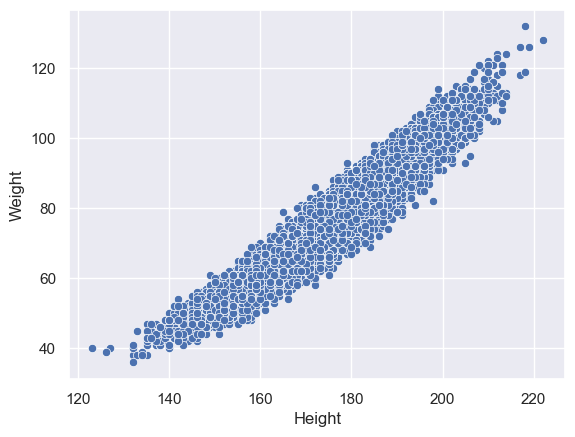

In [64]:
sns.scatterplot(x=calories_data['Height'], y=calories_data['Weight'])
plt.show()

# We have a kind of linear relationship between these two features which is
# quite obvious %%

To find the distribution of age column

C:\Users\mohba\AppData\Local\Temp\ipykernel_37512\1651734651.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Age'])


<Axes: xlabel='Age', ylabel='Density'>

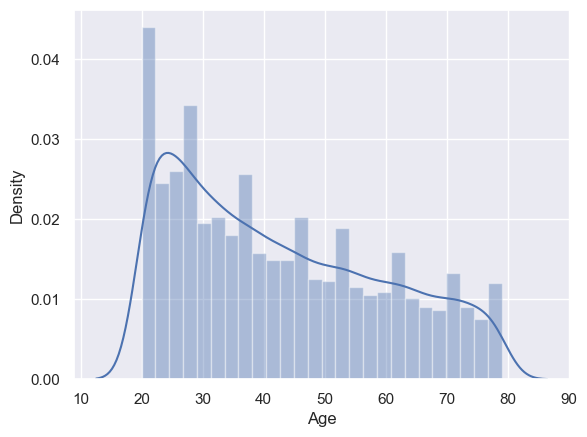

In [65]:
sns.distplot(calories_data['Age'])

#From the plot, we can observe that the Age column has the mean value of 42
#And the data is positively skewed & most of the datapoints "ages" are in between 20 to 50.

To find the distribution of height column

C:\Users\mohba\AppData\Local\Temp\ipykernel_37512\3298595761.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Height'])


<Axes: xlabel='Height', ylabel='Density'>

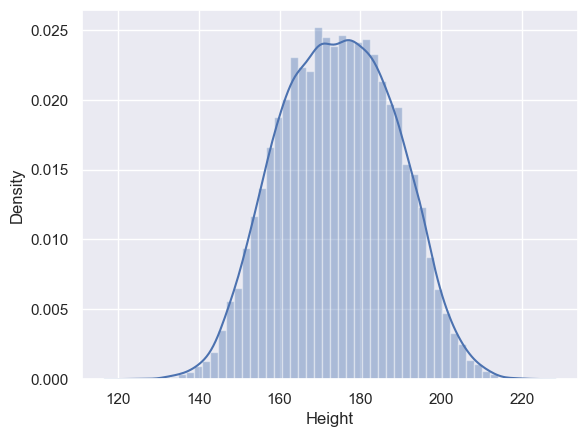

In [66]:
sns.distplot(calories_data['Height'])
#From the plot we can observe that the height data is normally distributed with mean of 174cm.

To find the distribution of weight, Duration,  HeartRate and Body tempreature column

C:\Users\mohba\AppData\Local\Temp\ipykernel_37512\3241275704.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Weight'])


<Axes: xlabel='Weight', ylabel='Density'>

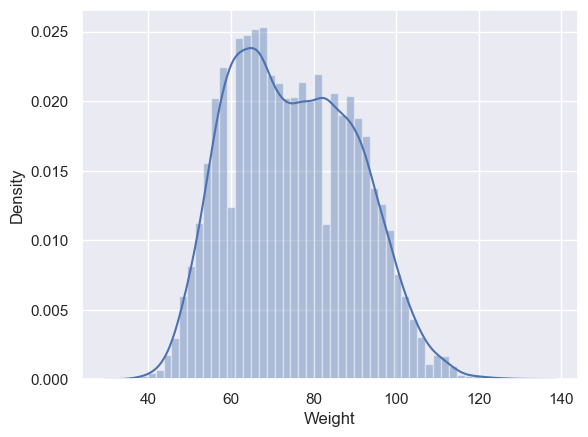

In [67]:
sns.distplot(calories_data['Weight'])

#From the plot we can observe that the weight data is also normally distributed with mean of 75 kg

C:\Users\mohba\AppData\Local\Temp\ipykernel_37512\699545801.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Duration'])


<Axes: xlabel='Duration', ylabel='Density'>

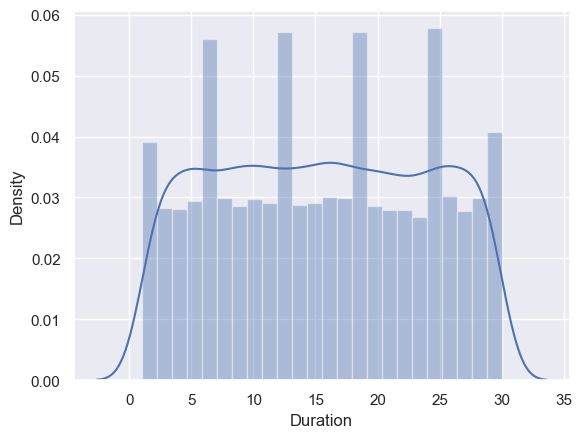

In [68]:
sns.distplot(calories_data['Duration'])

# from the plot we can observe that the duration data is a low peaked data with mean of 15mins

C:\Users\mohba\AppData\Local\Temp\ipykernel_37512\3037067045.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Heart_Rate'])


<Axes: xlabel='Heart_Rate', ylabel='Density'>

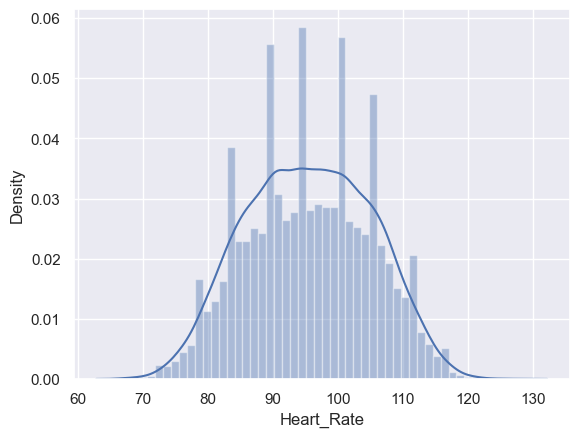

In [69]:
sns.distplot(calories_data['Heart_Rate'])

#from the plot we can observe that the heart rate column is normally distributed with mean of 95 heart beats with several outliers.

C:\Users\mohba\AppData\Local\Temp\ipykernel_37512\3161703934.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Body_Temp'])


<Axes: xlabel='Body_Temp', ylabel='Density'>

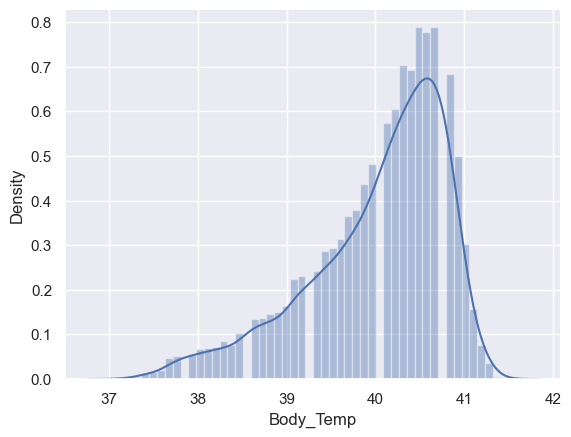

In [70]:
sns.distplot(calories_data['Body_Temp'])

#from the plot we can observe that the temperature column is negatively skewed with mean of 40.

Scatter plot for features and Calories column

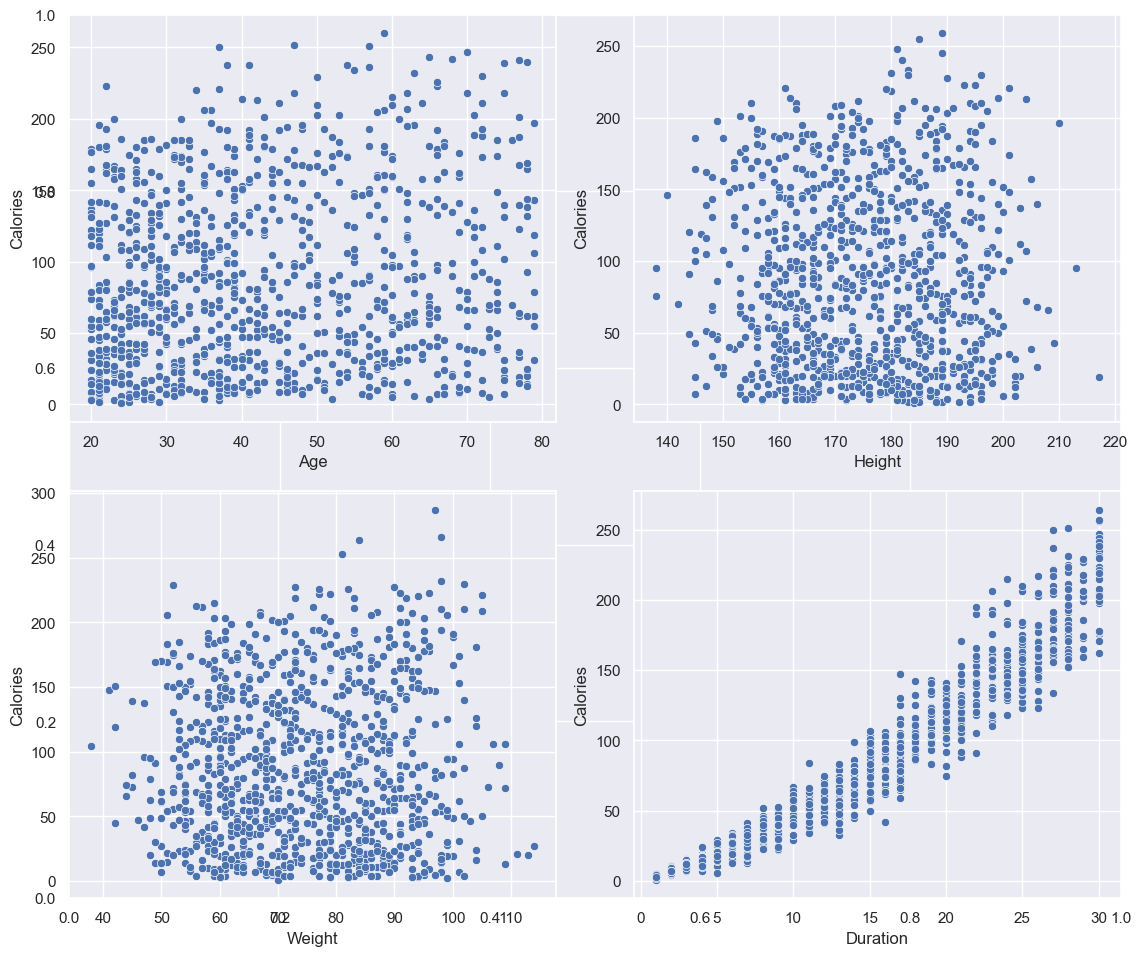

In [71]:
features = ['Age', 'Height', 'Weight', 'Duration']

plt.subplots(figsize=(12, 10))
for i, col in enumerate(features):
    plt.subplot(2, 2, i + 1)
    x = calories_data.sample(1000)
    sns.scatterplot(data=x, x=col, y='Calories')
plt.tight_layout()
plt.show()

#As expected higher is the duration of the workout higher will be the calories burnt. But we couldnt observe any such relation between calories burnt and height or weight features

To find the correlation in the data

<Axes: >

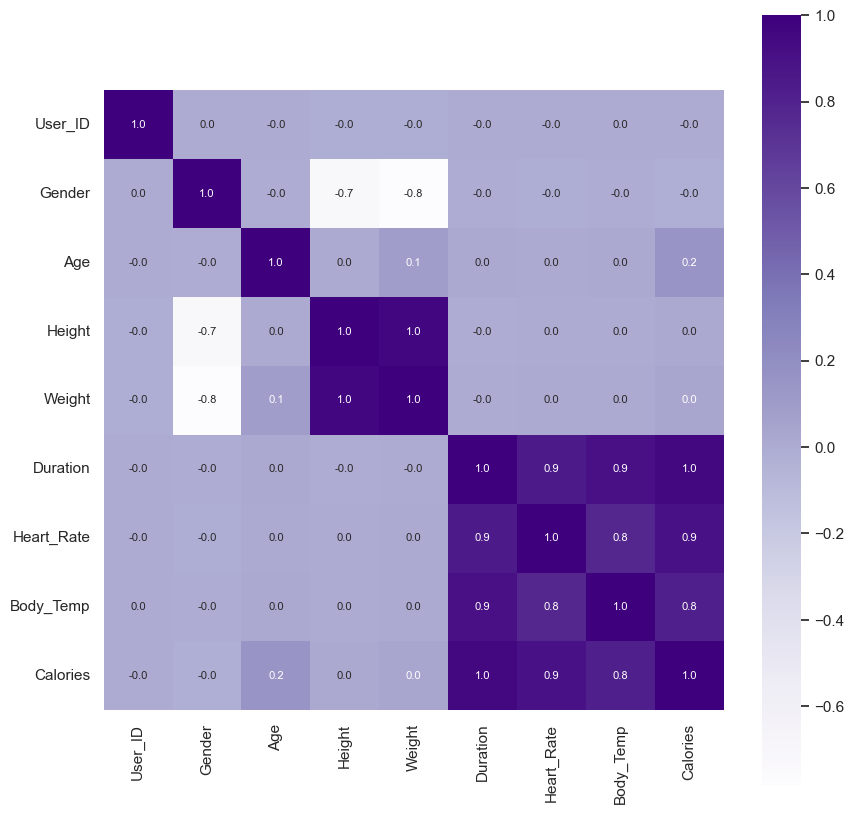

In [72]:
correlation = calories_data.corr()

plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Purples')

# Construction of heat map for the understanding of correlation.

# Duration & calories are directly proportional"positively correlated".

#Baseline model results and evaluation metrics

Separation of Target and Features

In [73]:
X=calories_data.drop(['User_ID','Calories'],axis=1)
Y=calories_data['Calories']
print(X)

       Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0           0   68     190      94        29         105       40.8
1           1   20     166      60        14          94       40.3
2           0   69     179      79         5          88       38.7
3           1   34     179      71        13         100       40.5
4           1   27     154      58        10          81       39.8
...       ...  ...     ...     ...       ...         ...        ...
14995       1   20     193      86        11          92       40.4
14996       1   27     165      65         6          85       39.2
14997       1   43     159      58        16          90       40.1
14998       0   78     193      97         2          84       38.3
14999       0   63     173      79        18          92       40.5

[15000 rows x 7 columns]


In [74]:
print(Y)

0        231
1         66
2         26
3         71
4         35
        ... 
14995     45
14996     23
14997     75
14998     11
14999     98
Name: Calories, Length: 15000, dtype: int64


Splitting the data into training and test

In [75]:
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2,random_state=2)

In [76]:
print(X.shape,X_train.shape,X_test.shape)

(15000, 7) (12000, 7) (3000, 7)


# We can observe that :

* X contains the orignal amount of data (which is 15000)
* X_train contains 80% of the data (which is 12000)
* X_test contains 20% of the data which is 3000

**Evaluation**

Evaluation is done by "test data"

Prediction of the data

Model Implementation

In [77]:
#NORMALIZATION
X_train_n = X_train.copy()
X_test_n = X_test.copy()

# Fit min-max scaler on training data
norm = MinMaxScaler().fit(X_train_n)

# Transform the training data
X_train_norm = norm.transform(X_train_n)

# the same scaler to transform the testing set
X_test_norm = norm.transform(X_test_n)

In [78]:
X_train_norm_df = pd.DataFrame(X_train_norm, columns=X.columns)

print(X_train_norm_df.describe())

             Gender           Age        Height        Weight      Duration  \
count  12000.000000  12000.000000  12000.000000  12000.000000  12000.000000   
mean       0.504750      0.383911      0.519405      0.422932      0.501710   
std        0.499998      0.287292      0.144087      0.163515      0.287136   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.135593      0.414141      0.293478      0.241379   
50%        1.000000      0.322034      0.515152      0.413043      0.517241   
75%        1.000000      0.610169      0.626263      0.543478      0.758621   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

         Heart_Rate     Body_Temp  
count  12000.000000  12000.000000  
mean       0.467627      0.657676  
std        0.157676      0.181369  
min        0.000000      0.000000  
25%        0.344262      0.558140  
50%        0.475410      0.697674  
75%        0.590164      0.790698  


XGBoost Regression Model

XGBoost Mean Absolute Error = 1.4833678883314132
XGBoost Mean Squared Error = 4.710710012461346
XGBoost Root Mean Squared Error = 2.1704170134933394


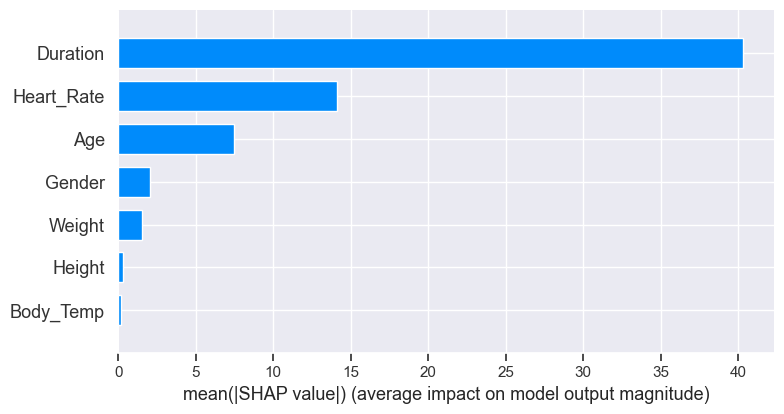

In [79]:
xgb_model = XGBRegressor()

# Create a pipeline with the XGBoost model
xgb_pipeline = Pipeline(steps=[('scaler', norm), ('model', xgb_model)])

# Fit the pipeline to the training data
xgb_pipeline.fit(X_train_norm, Y_train)

# Make predictions
xgb_calories_burnt_prediction = xgb_pipeline.predict(X_test_norm)

# Mean Absolute Error for XGBoost
xgb_MAE = metrics.mean_absolute_error(Y_test, xgb_calories_burnt_prediction)
print("XGBoost Mean Absolute Error =", xgb_MAE)

# Mean Squared Error for XGBoost
xgb_MSE = metrics.mean_squared_error(Y_test, xgb_calories_burnt_prediction)
print("XGBoost Mean Squared Error =", xgb_MSE)

# Root Mean Squared Error for XGBoost
xgb_RMSE = np.sqrt(xgb_MSE)
print("XGBoost Root Mean Squared Error =", xgb_RMSE)

# SHAP feature importance for XGBoost
xgb_model = xgb_pipeline.named_steps['model']  # Extract the trained model from the pipeline
xgb_explainer = shap.Explainer(xgb_model, X_train_norm)  # Use normalized training data to initialize explainer
xgb_shap_values = xgb_explainer(X_test_norm)  # Use normalized test data to compute SHAP values


# SHAP summary plot
shap.summary_plot(xgb_shap_values, X_test_norm, feature_names=X.columns, plot_type="bar")

Linear Regression Model

Linear Regression Mean Absolute Error = 8.385188053147184
Linear Regression Mean Squared Error = 130.08707386188377
Linear Regression Root Mean Squared Error = 11.405572053250278


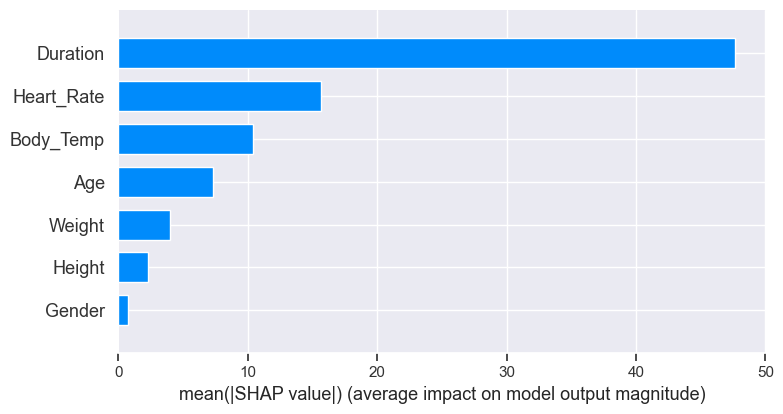

In [80]:
lr_model = LinearRegression()

# Create a pipeline with the Linear Regression model
lr_pipeline = Pipeline(steps=[('scaler', norm), ('model', lr_model)])

# Fit the pipeline to the training data
lr_pipeline.fit(X_train_norm, Y_train)

# Make predictions
lr_calories_burnt_prediction = lr_pipeline.predict(X_test_norm)

# Mean Absolute Error for Linear Regression
lr_MAE = metrics.mean_absolute_error(Y_test, lr_calories_burnt_prediction)
print("Linear Regression Mean Absolute Error =", lr_MAE)

# Mean Squared Error for Linear Regression
lr_MSE = metrics.mean_squared_error(Y_test, lr_calories_burnt_prediction)
print("Linear Regression Mean Squared Error =", lr_MSE)

# Root Mean Squared Error for Linear Regression
lr_RMSE = np.sqrt(lr_MSE)
print("Linear Regression Root Mean Squared Error =", lr_RMSE)

# SHAP feature importance for Linear Regression
lr_model = lr_pipeline.named_steps['model']  # Extract the trained model from the pipeline
lr_explainer = shap.Explainer(lr_model, X_train_norm)  # Use normalized training data to initialize explainer
lr_shap_values = lr_explainer(X_test_norm)  # Use normalized test data to compute SHAP values

# SHAP summary plot
shap.summary_plot(lr_shap_values, X_test_norm, feature_names=X.columns, plot_type="bar")

Random Forest Regression Model

Lasso Regression Model

Lasso Regression Mean Absolute Error = 10.663249354836099
Lasso Regression Mean Squared Error = 236.36568936409964
Lasso Regression Root Mean Squared Error = 15.374189063625426


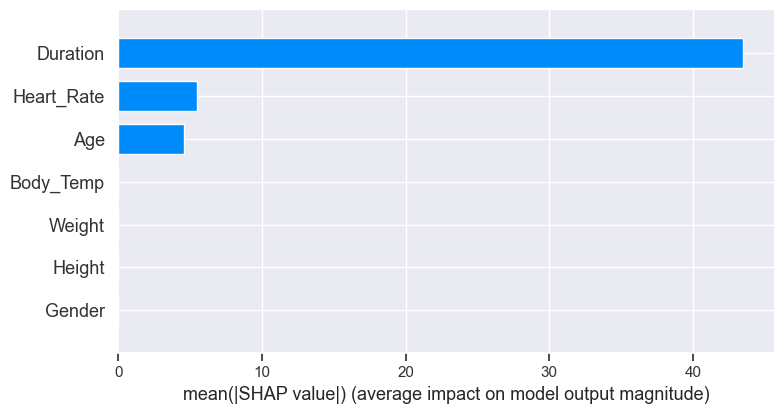

In [81]:
# Define Lasso model
lasso_model = Lasso()

# Create a pipeline with the Lasso model
lasso_pipeline = Pipeline(steps=[('scaler', norm), ('model', lasso_model)])

# Fit the pipeline to the training data
lasso_pipeline.fit(X_train_norm, Y_train)

# Make predictions
lasso_calories_burnt_prediction = lasso_pipeline.predict(X_test_norm)

# Mean Absolute Error for Lasso Regression
lasso_MAE = metrics.mean_absolute_error(Y_test, lasso_calories_burnt_prediction)
print("Lasso Regression Mean Absolute Error =", lasso_MAE)

# Mean Squared Error for Lasso Regression
lasso_MSE = metrics.mean_squared_error(Y_test, lasso_calories_burnt_prediction)
print("Lasso Regression Mean Squared Error =", lasso_MSE)

# Root Mean Squared Error for Lasso Regression
lasso_RMSE = np.sqrt(lasso_MSE)
print("Lasso Regression Root Mean Squared Error =", lasso_RMSE)

# SHAP feature importance for Lasso Regression
lasso_model = lasso_pipeline.named_steps['model']  # Extract the trained model from the pipeline
lasso_explainer = shap.Explainer(lasso_model, X_train_norm)  # Use normalized training data to initialize explainer
lasso_shap_values = lasso_explainer(X_test_norm)  # Use normalized test data to compute SHAP values

# SHAP summary plot
shap.summary_plot(lasso_shap_values, X_test_norm, feature_names=X.columns, plot_type="bar")

Ridge regression model

Ridge Regression Mean Absolute Error = 8.375874219928924
Ridge Regression Mean Squared Error = 130.09233176916143
Ridge Regression Root Mean Squared Error = 11.405802548227873


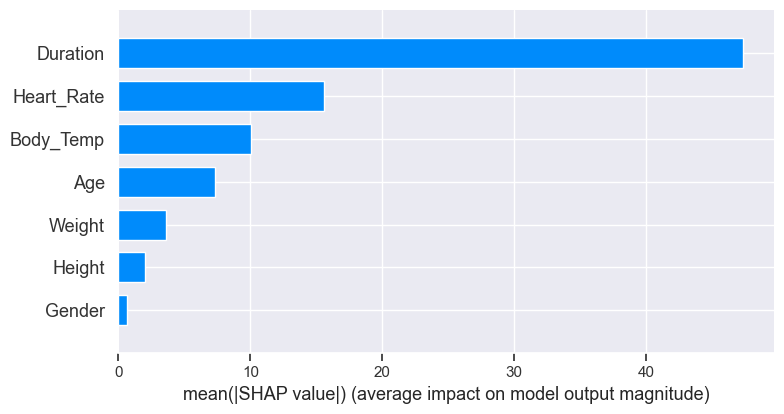

In [82]:
# Define Ridge model
ridge_model = Ridge()

# Create a pipeline with the Ridge model
ridge_pipeline = Pipeline(steps=[('scaler', norm), ('model', ridge_model)])

# Fit the pipeline to the training data
ridge_pipeline.fit(X_train_norm, Y_train)

# Make predictions
ridge_calories_burnt_prediction = ridge_pipeline.predict(X_test_norm)

# Mean Absolute Error for Ridge Regression
ridge_MAE = metrics.mean_absolute_error(Y_test, ridge_calories_burnt_prediction)
print("Ridge Regression Mean Absolute Error =", ridge_MAE)

# Mean Squared Error for Ridge Regression
ridge_MSE = metrics.mean_squared_error(Y_test, ridge_calories_burnt_prediction)
print("Ridge Regression Mean Squared Error =", ridge_MSE)

# Root Mean Squared Error for Ridge Regression
ridge_RMSE = np.sqrt(ridge_MSE)
print("Ridge Regression Root Mean Squared Error =", ridge_RMSE)

# SHAP feature importance for Ridge Regression
ridge_model = ridge_pipeline.named_steps['model']  # Extract the trained model from the pipeline
ridge_explainer = shap.Explainer(ridge_model, X_train_norm)  # Use normalized training data to initialize explainer
ridge_shap_values = ridge_explainer(X_test_norm)  # Use normalized test data to compute SHAP values

# SHAP summary plot
shap.summary_plot(ridge_shap_values, X_test_norm, feature_names=X.columns, plot_type="bar")

Out of all the above models, We have trained RandomForestRegressor and the XGB models performance is the same, as their MAE & accuracy for the validation data is same.



We will consider the XGBoost Regression Model in our Project for its high performance and efficiency

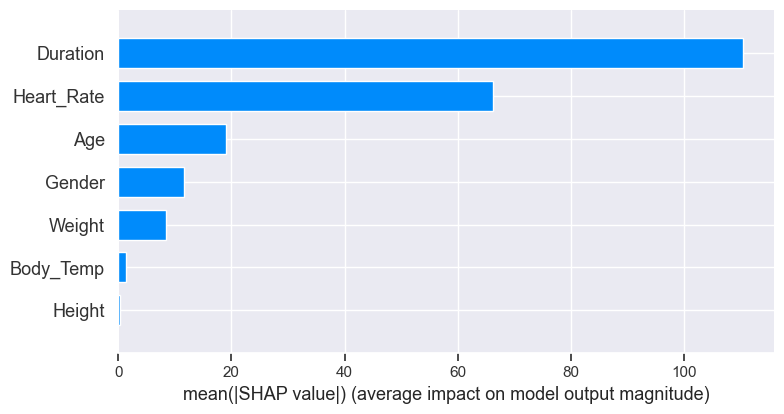

In [140]:
xgb_pipeline.fit(X_train, Y_train)

# Function to predict calories burnt
def predict_calories_burnt(gender, age, height, weight, duration, heart_rate, body_temp):
    # Create a DataFrame with the input values
    input_data = pd.DataFrame([[gender, age, height, weight, duration, heart_rate, body_temp]],
                              columns=['Gender', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp'])

    # Make prediction
    calories_burnt_prediction = xgb_pipeline.predict(input_data)[0]

    # Calculate SHAP values
    shap_values = xgb_explainer(input_data)

    # Plot SHAP bar plot
    shap.summary_plot(shap_values, input_data, plot_type='bar')
    plt.show()
    

    return calories_burnt_prediction

def run_prediction():
    try:
        gender = 0 if entry_gender.get().lower() == 'male' else 1
        age = float(entry_age.get())
        height = float(entry_height.get())
        weight = float(entry_weight.get())
        duration = float(entry_duration.get())
        heart_rate = float(entry_heart_rate.get())
        body_temp = float(entry_body_temp.get())

        # Call the existing function with inputs from the GUI
        predicted_calories = predict_calories_burnt(gender, age, height, weight, duration, heart_rate, body_temp)

        # Update the label with the predicted result
        label_result.config(text=f"Calories burnt: {predicted_calories:.2f}")
    except ValueError:
        messagebox.showwarning("Input Error", "Please enter valid numerical values.")

# Create the main application window
root = tk.Tk()
root.title("Calorie Burn Calculator")
root.geometry("500x500")  # Width x Height

# Style the application with the 'clam' theme
style = ttk.Style()
style.theme_use('vista')
style.configure('TLabel', font=('Helvetica', 12))
style.configure('TButton', font=('Helvetica', 12))

# Main frame
main_frame = ttk.Frame(root, padding="10 10 10 10")
main_frame.grid(row=0, column=0, sticky=(tk.W, tk.E, tk.N, tk.S))

# Title frame
title_frame = ttk.Frame(main_frame)
title_frame.grid(row=0, column=0, columnspan=2, pady=10)

# Load the fire icon image with error handling
try:
    icon_image = Image.open("c:/Users/mohba/Downloads/fire_icon.png.png")
    icon_image = icon_image.resize((32, 32), Image.LANCZOS)  # Resize the icon
    icon_photo = ImageTk.PhotoImage(icon_image)
    label_icon = ttk.Label(title_frame, image=icon_photo)
    label_icon.grid(row=0, column=0, padx=5)
except Exception as e:
    label_icon = ttk.Label(title_frame, text="🔥")
    label_icon.grid(row=0, column=0, padx=5)

# Title label
label_title = ttk.Label(title_frame, text="Calorie Burn Calculator", font=('Helvetica', 16, 'bold'))
label_title.grid(row=0, column=1, padx=5)

# Input frame
input_frame = ttk.Frame(main_frame, padding="10 10 10 10")
input_frame.grid(row=1, column=0, columnspan=2, pady=10)

# Labels and Entries for inputs
label_gender = ttk.Label(input_frame, text="Gender (male/female):")
label_gender.grid(row=0, column=0, padx=5, pady=5, sticky=tk.E)
entry_gender = ttk.Entry(input_frame)
entry_gender.grid(row=0, column=1, padx=5, pady=5)

label_age = ttk.Label(input_frame, text="Age (years):")
label_age.grid(row=1, column=0, padx=5, pady=5, sticky=tk.E)
entry_age = ttk.Entry(input_frame)
entry_age.grid(row=1, column=1, padx=5, pady=5)

label_height = ttk.Label(input_frame, text="Height (cm):")
label_height.grid(row=2, column=0, padx=5, pady=5, sticky=tk.E)
entry_height = ttk.Entry(input_frame)
entry_height.grid(row=2, column=1, padx=5, pady=5)

label_weight = ttk.Label(input_frame, text="Weight (kg):")
label_weight.grid(row=3, column=0, padx=5, pady=5, sticky=tk.E)
entry_weight = ttk.Entry(input_frame)
entry_weight.grid(row=3, column=1, padx=5, pady=5)

label_duration = ttk.Label(input_frame, text="Duration (minutes):")
label_duration.grid(row=4, column=0, padx=5, pady=5, sticky=tk.E)
entry_duration = ttk.Entry(input_frame)
entry_duration.grid(row=4, column=1, padx=5, pady=5)

label_heart_rate = ttk.Label(input_frame, text="Heart Rate (bpm):")
label_heart_rate.grid(row=5, column=0, padx=5, pady=5, sticky=tk.E)
entry_heart_rate = ttk.Entry(input_frame)
entry_heart_rate.grid(row=5, column=1, padx=5, pady=5)

label_body_temp = ttk.Label(input_frame, text="Body Temperature (°C):")
label_body_temp.grid(row=6, column=0, padx=5, pady=5, sticky=tk.E)
entry_body_temp = ttk.Entry(input_frame)
entry_body_temp.grid(row=6, column=1, padx=5, pady=5)

# Button to predict calories
button_predict = ttk.Button(main_frame, text="Predict", command=run_prediction)
button_predict.grid(row=2, column=0, columnspan=2, padx=5, pady=20)

# Label to display predicted result
label_result = ttk.Label(main_frame, text="Calories burnt: ")
label_result.grid(row=3, column=0, columnspan=2, padx=5, pady=20)

# Frame for plot
frame_plot = ttk.Frame(main_frame)
frame_plot.grid(row=4, column=0, columnspan=2, padx=5, pady=5)

# Bind the <Return> key to move to the next entry field
entry_gender.bind("<Return>", lambda event: entry_age.focus_set())
entry_age.bind("<Return>", lambda event: entry_height.focus_set())
entry_height.bind("<Return>", lambda event: entry_weight.focus_set())
entry_weight.bind("<Return>", lambda event: entry_duration.focus_set())
entry_duration.bind("<Return>", lambda event: entry_heart_rate.focus_set())
entry_heart_rate.bind("<Return>", lambda event: entry_body_temp.focus_set())
entry_body_temp.bind("<Return>", lambda event: run_prediction())

# Run the application
root.mainloop()

Predicted calories burnt during exercise: 311.31204


C:\Users\mohba\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


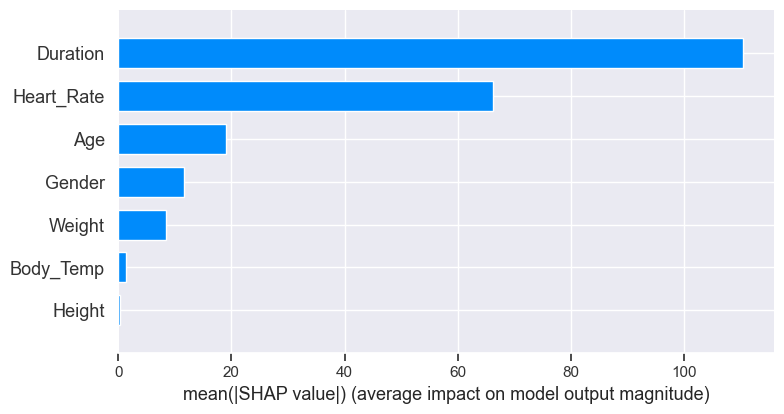

In [84]:
xgb_pipeline.fit(X_train, Y_train)



# Function to predict calories burnt
def predict_calories_burnt(gender, age, height, weight, duration, heart_rate, body_temp):
    # Create a DataFrame with the input values
    input_data = pd.DataFrame([[gender, age, height, weight, duration, heart_rate, body_temp]],
                              columns=['Gender', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp'])



    # Make prediction
    calories_burnt_prediction = xgb_pipeline.predict(input_data)
    print("Predicted calories burnt during exercise:", calories_burnt_prediction[0])

    # Calculate SHAP values
    shap_values = xgb_explainer(input_data)

    # Plot SHAP bar plot
    shap.summary_plot(shap_values, input_data, plot_type='bar')
    plt.show()

# Get input from the user

gender = int(input("Enter your gender (0 for male, 1 for female): "))
age = float(input("Enter your age: "))
height = float(input("Enter your height (in cm): "))
weight = float(input("Enter your weight (in kg): "))
duration = float(input("Enter exercise duration (in minutes): "))
heart_rate = float(input("Enter your heart rate: "))
body_temp = float(input("Enter your body temperature (in Celsius): "))

# Predict calories burnt and plot SHAP summary plot
predict_calories_burnt(gender, age, height, weight, duration, heart_rate, body_temp)


GUI